# Measuring consensus around given names in the United States from 1880 to 2017

This project is a visual analysis of trends of given names in the United States. It breaks down the entire newborn population each year into groups based on name popularity (children with the most popular name, 10 most popular names, etc.).

All data was downloaded from the US Social Security Administration website: https://www.ssa.gov/OACT/babynames/limits.html

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
#set basic parameters for CSV parsing
start_year = 1880
end_year = 2018
path = 'names/'

In [61]:
#instantiate names DataFrame
names = pd.DataFrame()

#iterate through 
for year in range(start_year, end_year):
        single_file = pd.read_csv(f'{path}yob{year}.txt', header=None, names=["name", 'gender', 'occurrence'])
        single_file['year'] = year
        names = pd.concat([names, single_file])

In [62]:
names.head()

,name,gender,occurrence,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [63]:
#sort out male and female names into separate DataFrames
male = names[(names.gender == 'M')]
female = names[(names.gender == 'F')]

In [64]:
male.head()

,name,gender,occurrence,year
942,John,M,9655,1880
943,William,M,9532,1880
944,James,M,5927,1880
945,Charles,M,5348,1880
946,George,M,5126,1880


In [65]:
female.head()

,name,gender,occurrence,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [66]:
def top_name_occurrences(names, top_name_divisions=[1,10,100,1000,10000]):
    """
    Take DataFrame of names, occurrences, and years, then calculate how many people were given the top x names.
    """
    year_summaries = []

    for year in names.year.unique():
        current_year_df = pd.DataFrame({'year':[year]})
        
        current_year_names = names[(names.year == year)].sort_values(by=['occurrence'], ascending=False)
        remaining_occurrences = current_year_names.occurrence.sum()

        for idx, div in enumerate(top_name_divisions):
            if idx == 0:
                current_group_names = current_year_names[0:div]
            else:
                last_div = top_name_divisions[idx-1]
                current_group_names = current_year_names[last_div:div]
            current_group_occurrences = current_group_names.occurrence.sum()
            current_year_df[f'top_{div}_names'] = current_group_occurrences
            
            remaining_occurrences -= current_group_occurrences
            
        current_year_df['remaining_names'] = remaining_occurrences
        
        year_summaries.append(current_year_df)
    return pd.concat(year_summaries)

In [67]:
def chart_data_preparation(top_name_occurrences):
    import numpy as np
    """
    Take name occurrence data 'top_name_occurrences', convert to numpy array, normalize values for 100% stacked area chart, and transpose for use with pyplot.
    Also export numpy array of years for the x axis.
    """
    x = np.array(top_name_occurrences.year)
    relevant_cols = top_name_occurrences.iloc[:,1:]
    normalized_cols = relevant_cols.divide(relevant_cols.sum(axis=1), axis=0) * 100
    y = np.transpose(np.array(normalized_cols))
    return x, y

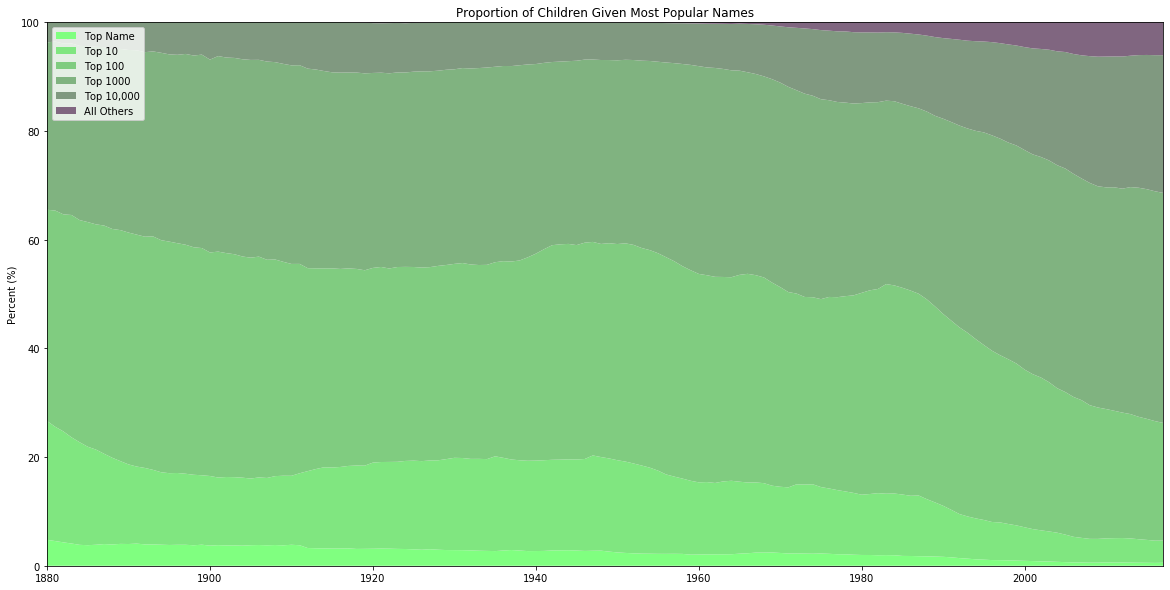

In [119]:
#plot overall name trends

x, y = chart_data_preparation(top_name_occurrences(names))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.stackplot(x, y, colors=[(0.5, 1, 0.5),(0.5, 0.9, 0.5),(0.5, 0.8, 0.5),(0.5, 0.7, 0.5),(0.5, 0.6, 0.5),(0.5, 0.4, 0.5)])
ax.set_title('Proportion of Children Given Most Popular Names')
ax.set_ylabel('Percent (%)')
ax.legend(['Top Name', 'Top 10', 'Top 100', 'Top 1000', 'Top 10,000', 'All Others'], loc='upper left')
ax.margins(0, 0)

plt.show()

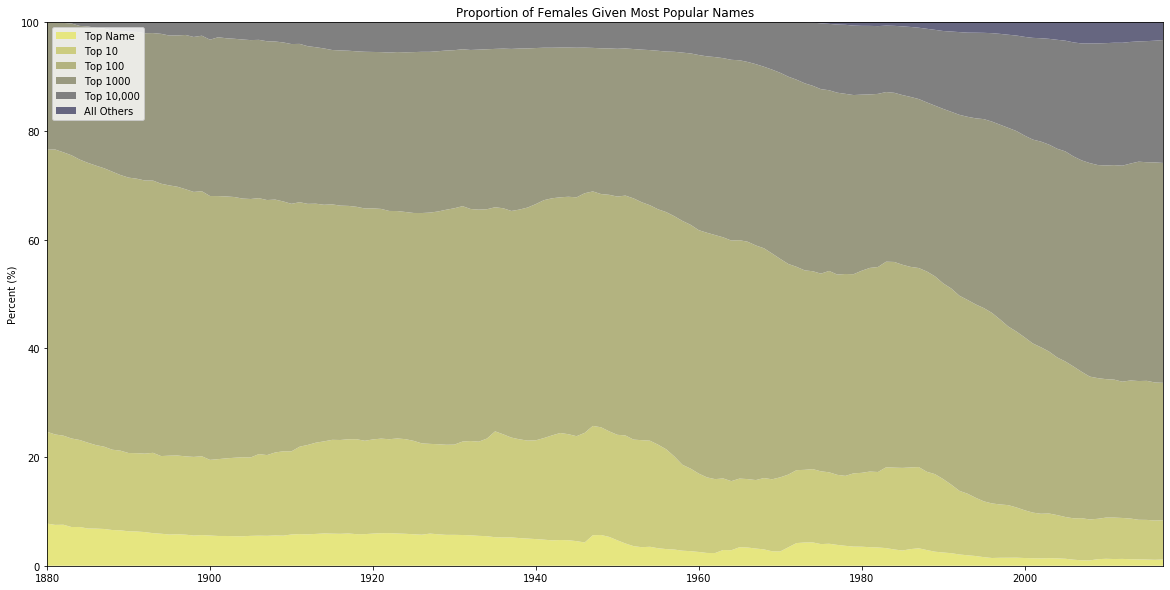

In [114]:
#plot female name trends

x, y = chart_data_preparation(top_name_occurrences(female))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.stackplot(x, y, colors=[(x/10, x/10, 0.5) for x in reversed(range(4,10))])
ax.set_title('Proportion of Females Given Most Popular Names')
ax.set_ylabel('Percent (%)')
ax.legend(['Top Name', 'Top 10', 'Top 100', 'Top 1000', 'Top 10,000', 'All Others'], loc='upper left')
ax.margins(0, 0)

plt.show()

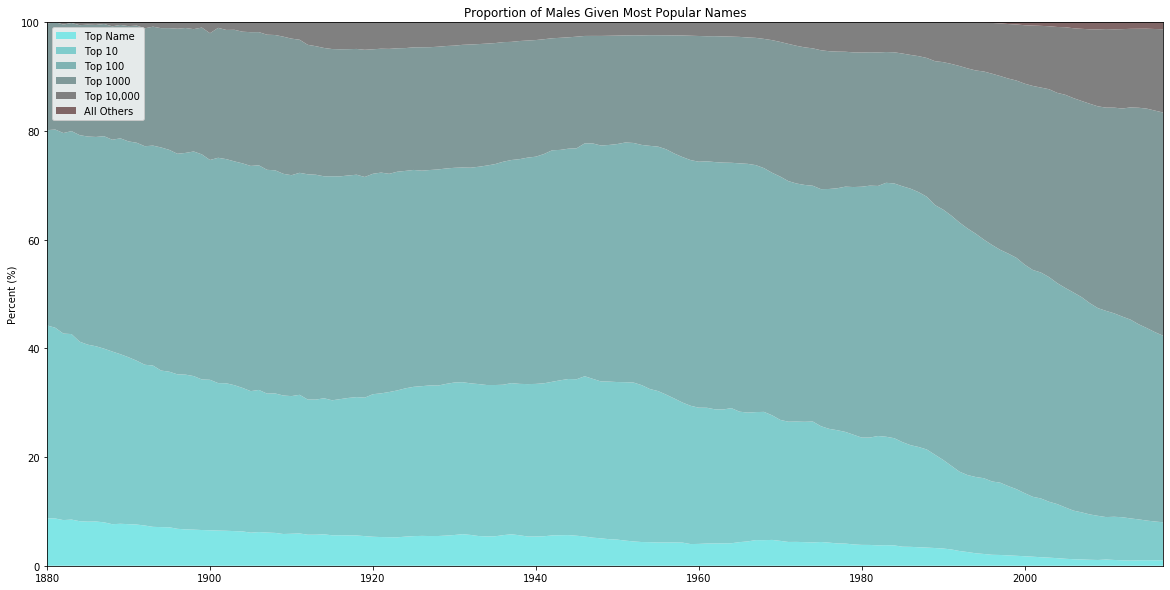

In [120]:
#plot male name trends

x, y = chart_data_preparation(top_name_occurrences(male))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.stackplot(x, y, colors=[(0.5, x/10, x/10) for x in reversed(range(4,10))])
ax.set_title('Proportion of Males Given Most Popular Names')
ax.set_ylabel('Percent (%)')
ax.legend(['Top Name', 'Top 10', 'Top 100', 'Top 1000', 'Top 10,000', 'All Others'], loc='upper left')
ax.margins(0, 0)

plt.show()